PROJECT DETAILS/STEPS
* Load heart disease dataset in pandas dataframe
* Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
* Convert text columns to numbers using label encoding and one hot encoding
* Apply scaling
* Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
* Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
* Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('heart.csv')

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


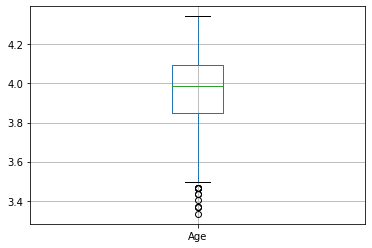

C:\Users\Elza Shany\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


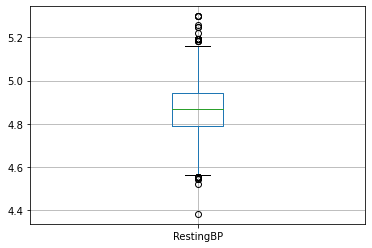

C:\Users\Elza Shany\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


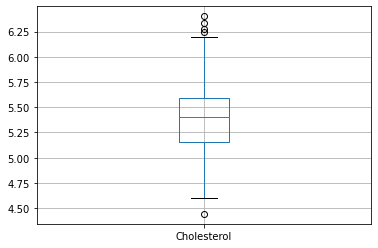

C:\Users\Elza Shany\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Elza Shany\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


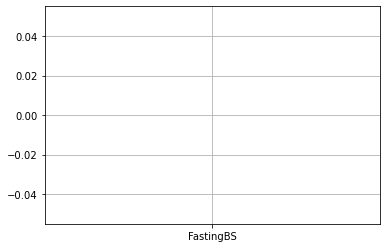

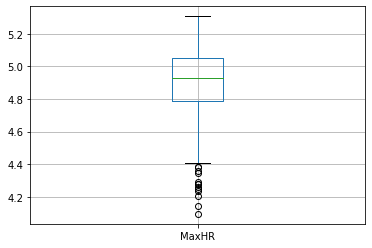

C:\Users\Elza Shany\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Elza Shany\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Elza Shany\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stat

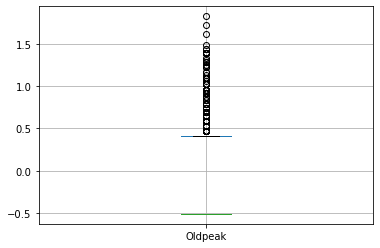

C:\Users\Elza Shany\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Elza Shany\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Elza Shany\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


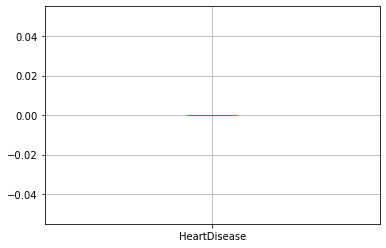

In [17]:
df_1=df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']]
for feature in df_1:
    data=df_1.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.show()

In [21]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [22]:
df1=df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]

In [23]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [24]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [25]:
df2=df1[df1.RestingBP<=(df1.RestingBP.mean()+3*df1.RestingBP.std())]

In [26]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [27]:
df[df.Age>(df.Age.mean()+3*df.Age.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [28]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [29]:
df3=df2[df2.Oldpeak<=(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]

In [30]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [35]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [33]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [36]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [37]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [31]:
df4=df3.copy()
df4.ExerciseAngina.replace({'N':0,'Y':1},inplace=True)
df4.ST_Slope.replace({'Down':1,'Flat':2,'Up':3},inplace=True)
df4.RestingECG.replace({'Normal':1,'ST':2,'LVH':3},inplace=True)

In [38]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [40]:
df5=pd.get_dummies(df4,drop_first=True)

In [42]:
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [45]:
x=df5.drop('HeartDisease',axis=1)
y=df5.HeartDisease
x.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

Train a model using standalone support vector machine and then using bagging

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores=cross_val_score(SVC(),x,y,cv=5)
scores.mean()

0.6906445672191528

Using bagging with svm

In [49]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(base_estimator=SVC(),n_estimators=100,max_samples=0.8,random_state=0)
scores=cross_val_score(bag_model,x,y,cv=5)
scores.mean()

0.6839656230816453

As you can see above, using bagging in case of SVM doesn't make much difference in terms of model accuracy. Bagging is effective when we have high variance and instable model such as decision tree. Let's explore how bagging changes the performance for a decision tree classifier.

Train a model using decision tree and then using bagging

In [50]:
from sklearn.tree import DecisionTreeClassifier
scores=cross_val_score(DecisionTreeClassifier(random_state=0),x,y,cv=5)
scores.mean()

0.7193984039287907

Use bagging with decision tree

In [51]:
bag_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=100,max_samples=0.9,oob_score=True,random_state=0)
scores=cross_val_score(bag_model,x,y,cv=5)
scores.mean()

0.8037016574585636

Score improved from 71% to 80%

Train a model using Random Forest which itself uses bagging underneath

In [52]:
from sklearn.ensemble import RandomForestClassifier
scores=cross_val_score(RandomForestClassifier(),x,y,cv=5)
scores.mean()

0.8247882136279927

Random forest gave even a better performance with 81.7% as score. Underneath it used bagging where it sampled not only data rows but also the columns (or features)